In [1]:
from imblearn.combine import SMOTETomek

In [40]:
#importing pandas and numpy
import pandas as pd
import numpy as np

#importing visual libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#for Q-Q plot 
import scipy.stats as stats

#To ignore warning
import warnings
warnings.filterwarnings('ignore')

#Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report

#save the model
import pickle

In [41]:
df = pd.read_csv('https://raw.githubusercontent.com/Murali423/Linear_Regression/master/Algerian_forest_fires_dataset_UPDATE.csv',header=1,skiprows=[124,125,126])
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
240,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 26.8+ KB


In [43]:
df.columns = [x.strip() for x in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [44]:
# Adding the region
df['Region']= [1 if i <= 121 else 0 for i in df.index]

In [45]:
# dropping the year columns it has same data throuhout the dataset
df.drop(['year'], axis=1, inplace=True)

In [46]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [47]:
df['Classes'] = df['Classes'].map(lambda x: x.strip())

In [48]:
# finding the missing values
df.isnull().sum()

day            0
month          0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [49]:
df['Classes']=df['Classes'].str.replace('not fire','0')
df['Classes']=df['Classes'].str.replace('fire','1')

In [50]:
df['Classes'] = df['Classes'].astype(int)

In [51]:
x_col = ['day', 'month','Temperature','RH', 'Ws', 'Rain', 'FFMC',
        'ISI', 'BUI', 'FWI', 'Region']
print(x_col)
y_col = ['Classes']
print(y_col)

['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'ISI', 'BUI', 'FWI', 'Region']
['Classes']


In [52]:
X1 = df[x_col]
X1

,day,month,Temperature,RH,Ws,Rain,FFMC,ISI,BUI,FWI,Region
0,1,6,29,57,18,0.0,65.7,1.3,3.4,0.5,1
1,2,6,29,61,13,1.3,64.4,1.0,3.9,0.4,1
2,3,6,26,82,22,13.1,47.1,0.3,2.7,0.1,1
3,4,6,25,89,13,2.5,28.6,0.0,1.7,0.0,1
4,5,6,27,77,16,0.0,64.8,1.2,3.9,0.5,1
...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,30,65,14,0.0,85.4,4.5,16.9,6.5,0
240,27,9,28,87,15,4.4,41.1,0.1,6.2,0.0,0
241,28,9,27,87,29,0.5,45.9,0.4,3.4,0.2,0
242,29,9,24,54,18,0.1,79.7,1.7,5.1,0.7,0


In [53]:
y1 = df['Classes']
y1.head()

0    0
1    0
2    0
3    0
4    0
Name: Classes, dtype: int64

In [54]:
X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(X1, y1, test_size=0.10, random_state=17)

In [55]:
X_train_imb

,day,month,Temperature,RH,Ws,Rain,FFMC,ISI,BUI,FWI,Region
156,5,7,34,45,18,0.0,90.5,11.3,18.7,15.0,0
183,1,8,38,52,14,0.0,78.3,2.0,4.4,0.8,0
11,12,6,26,81,19,0.0,84.0,4.8,17.7,7.1,1
75,15,8,36,55,13,0.3,82.4,3.7,22.0,6.3,1
130,9,6,27,59,18,0.1,78.1,2.4,8.3,1.9,0
...,...,...,...,...,...,...,...,...,...,...,...
150,29,6,37,36,13,0.6,86.2,4.8,17.8,7.2,0
134,13,6,30,52,15,2.0,72.3,1.4,10.9,0.9,0
143,22,6,33,46,14,1.1,78.3,1.9,7.7,1.2,0
241,28,9,27,87,29,0.5,45.9,0.4,3.4,0.2,0


In [56]:
### Replacing all values as 1 in y_train and all values as zero in y_test to create imbalance 

y_train_imb=y_train_imb.replace(0,1)

In [57]:
y_test_imb=y_test_imb.replace(1,0)
y_test_imb.head()

48     0
216    0
101    0
38     0
86     0
Name: Classes, dtype: int64

In [58]:
### Combining X_train_imb and y_train_imb
train_imb=X_train_imb.join(pd.DataFrame(y_train_imb))
train_imb.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,ISI,BUI,FWI,Region,Classes
156,5,7,34,45,18,0.0,90.5,11.3,18.7,15.0,0,1
183,1,8,38,52,14,0.0,78.3,2.0,4.4,0.8,0,1
11,12,6,26,81,19,0.0,84.0,4.8,17.7,7.1,1,1
75,15,8,36,55,13,0.3,82.4,3.7,22.0,6.3,1,1
130,9,6,27,59,18,0.1,78.1,2.4,8.3,1.9,0,1


In [59]:
### Combining X_test_imb and y_test_imb
test_imb=X_test_imb.join(pd.DataFrame(y_test_imb))
test_imb.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,ISI,BUI,FWI,Region,Classes
48,19,7,35,59,17,0.0,88.1,7.7,18.2,10.9,1,0
216,3,9,28,75,16,0.0,82.2,3.3,6.0,2.5,0,0
101,10,9,33,73,12,1.8,59.9,0.7,2.7,0.3,1,0
38,9,7,32,68,14,1.4,66.6,1.1,7.4,0.6,1,0
86,26,8,31,78,18,0.0,85.8,4.7,57.1,13.7,1,0


In [60]:
### Combining train_imb dataset and test_imb dataset into data_imb dataset 
data_imb=pd.concat([train_imb, test_imb], ignore_index=True, sort=False)

In [61]:
data_imb.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,ISI,BUI,FWI,Region,Classes
0,5,7,34,45,18,0.0,90.5,11.3,18.7,15.0,0,1
1,1,8,38,52,14,0.0,78.3,2.0,4.4,0.8,0,1
2,12,6,26,81,19,0.0,84.0,4.8,17.7,7.1,1,1
3,15,8,36,55,13,0.3,82.4,3.7,22.0,6.3,1,1
4,9,6,27,59,18,0.1,78.1,2.4,8.3,1.9,0,1


In [62]:
### there is imbalence in our dataset
data_imb.Classes.value_counts()

1    219
0     25
Name: Classes, dtype: int64

<AxesSubplot:xlabel='Classes', ylabel='count'>

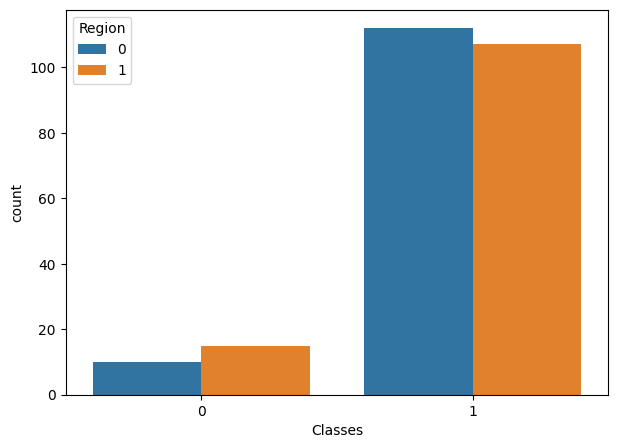

In [63]:
### 0 is not fire and 1 i fire for Classes
### 0 is Bejaia region and 1 is Sidi Bel-abbes region 
plt.figure(figsize=(7,5))
sns.countplot(data=data_imb, x='Classes', hue='Region')

In [64]:
data_imb.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,ISI,BUI,FWI,Region,Classes
0,5,7,34,45,18,0.0,90.5,11.3,18.7,15.0,0,1
1,1,8,38,52,14,0.0,78.3,2.0,4.4,0.8,0,1
2,12,6,26,81,19,0.0,84.0,4.8,17.7,7.1,1,1
3,15,8,36,55,13,0.3,82.4,3.7,22.0,6.3,1,1
4,9,6,27,59,18,0.1,78.1,2.4,8.3,1.9,0,1


In [65]:
X1=data_imb.iloc[:,:-1]
y1=data_imb.iloc[:,-1]

### Processing the Imbalnced data

In [66]:
from imblearn.combine import SMOTETomek

In [67]:
smk=SMOTETomek()
smk

SMOTETomek()

In [68]:
X_bal,y_bal=smk.fit_resample(X1,y1)

In [69]:
X_bal.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,ISI,BUI,FWI,Region
0,5,7,34,45,18,0.0,90.5,11.3,18.7,15.0,0
1,1,8,38,52,14,0.0,78.3,2.0,4.4,0.8,0
2,12,6,26,81,19,0.0,84.0,4.8,17.7,7.1,1
3,15,8,36,55,13,0.3,82.4,3.7,22.0,6.3,1
4,9,6,27,59,18,0.1,78.1,2.4,8.3,1.9,0


In [70]:
y_bal.head()

0    1
1    1
2    1
3    1
4    1
Name: Classes, dtype: int64

In [71]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y1)))
print('Resampled dataset shape {}'.format(Counter(y_bal)))

Original dataset shape Counter({1: 219, 0: 25})
Resampled dataset shape Counter({1: 217, 0: 217})


In [72]:
### Now our dataset is balanced
X_bal.shape, y_bal.shape

((434, 11), (434,))

In [73]:
### Creating data_bal for basic EDA on dataset after balancing imbalanced dataset
data_bal=X_bal.join(pd.DataFrame(y_bal))
data_bal.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,ISI,BUI,FWI,Region,Classes
0,5,7,34,45,18,0.0,90.5,11.3,18.7,15.0,0,1
1,1,8,38,52,14,0.0,78.3,2.0,4.4,0.8,0,1
2,12,6,26,81,19,0.0,84.0,4.8,17.7,7.1,1,1
3,15,8,36,55,13,0.3,82.4,3.7,22.0,6.3,1,1
4,9,6,27,59,18,0.1,78.1,2.4,8.3,1.9,0,1


In [74]:
data_bal[data_bal.columns].nunique()

day             31
month            4
Temperature     19
RH              63
Ws              18
Rain           135
FFMC           364
ISI            297
BUI            364
FWI            311
Region           2
Classes          2
dtype: int64

In [75]:
### Getting list of numerical features excluding Classes and Region
x_col

['day',
 'month',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'ISI',
 'BUI',
 'FWI',
 'Region']

In [76]:
discrete_features = ['day', 'month', 'Temperature', 'Ws', 'Region']

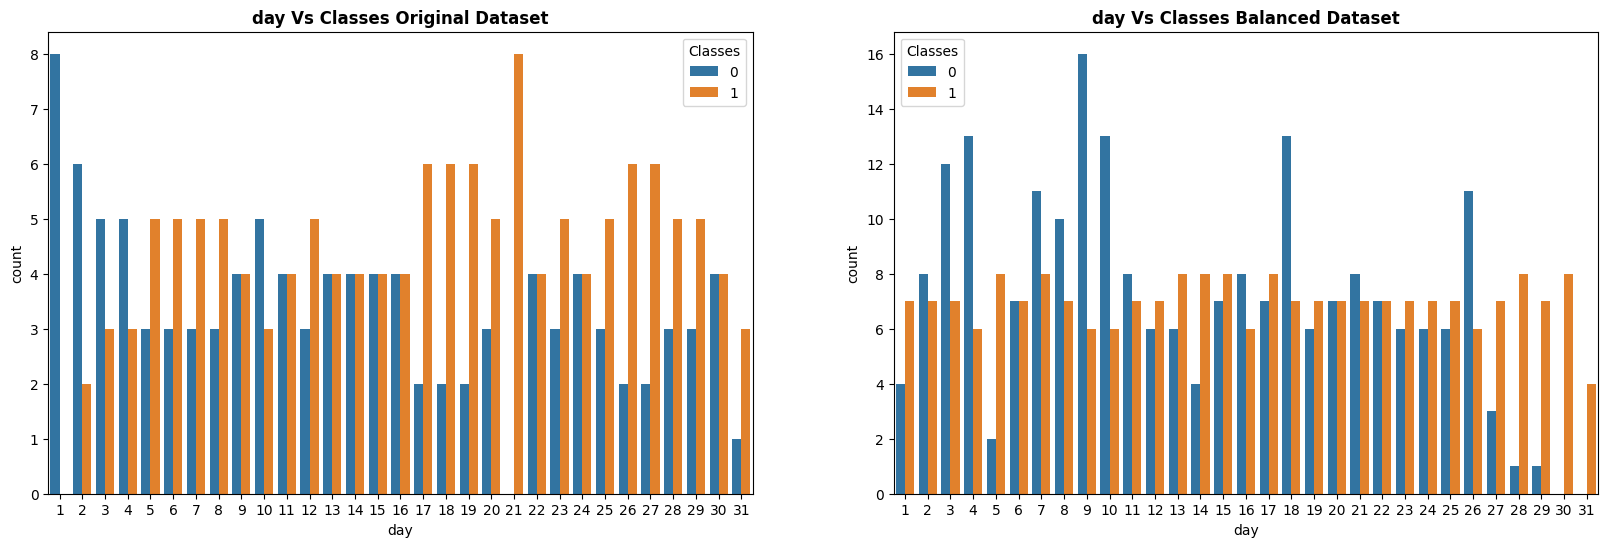

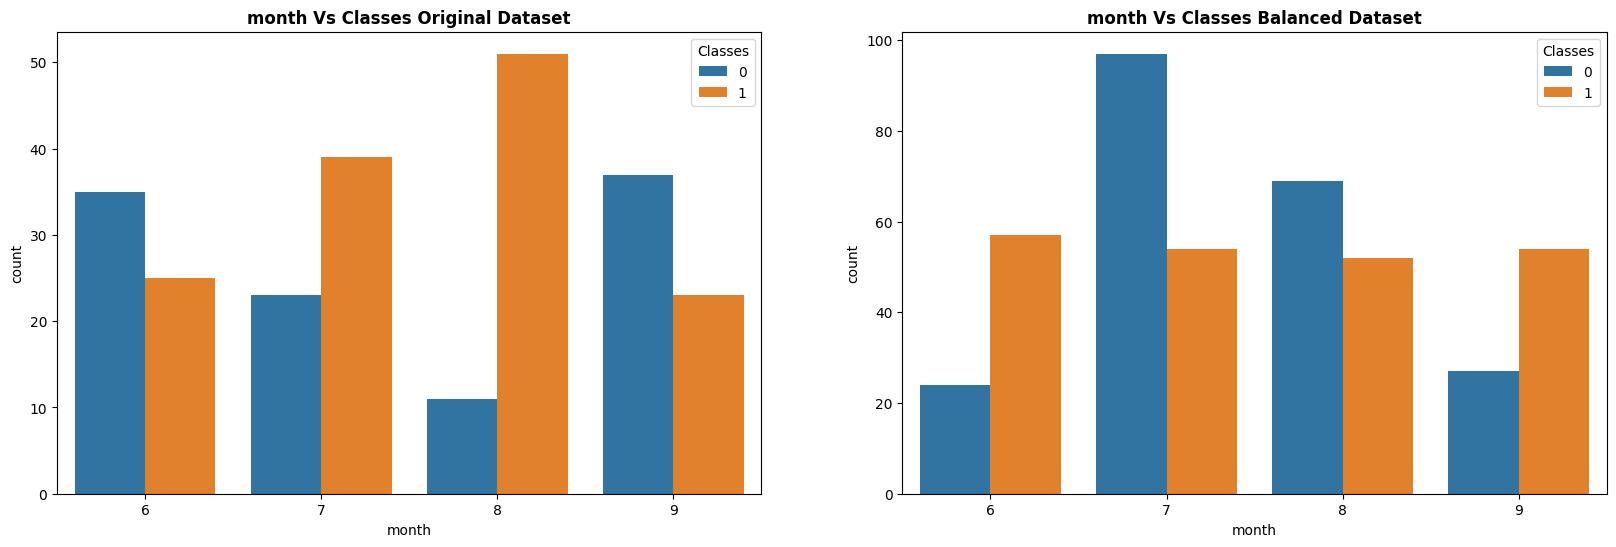

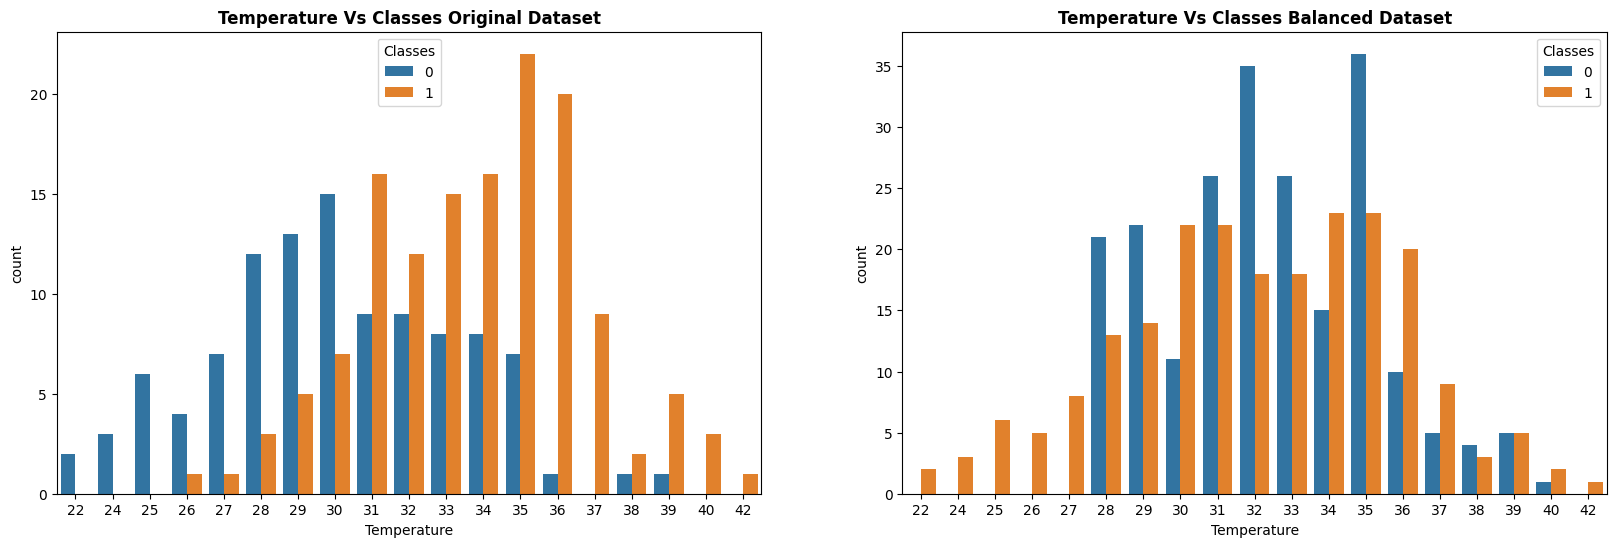

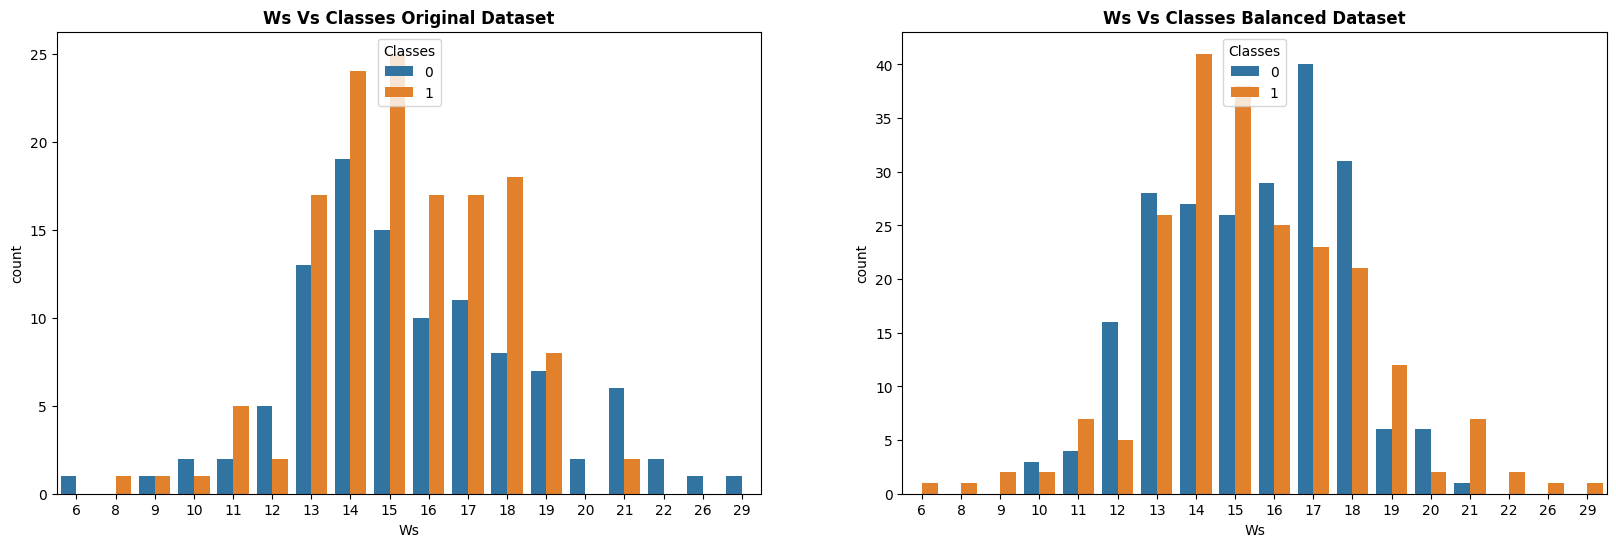

In [78]:
### this is bivariate analysis between target feature classes and discrete numerical features
### for this we plot count plot
count_feat=[feature for feature in discrete_features if feature not in ['Region']]

for feature in count_feat:
    plt.figure(figsize=(20,6))
    plt.subplot(121)
    sns.countplot(data=df, x=feature, hue='Classes')
    plt.title("{} Vs Classes Original Dataset".format(feature),fontweight="bold")
    
    plt.subplot(122)
    sns.countplot(data=data_bal, x=feature, hue='Classes')
    plt.title("{} Vs Classes Balanced Dataset".format(feature),fontweight="bold")

In [79]:
continuous_features = ['RH', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

ValueError: Could not interpret value `DMC` for parameter `x`

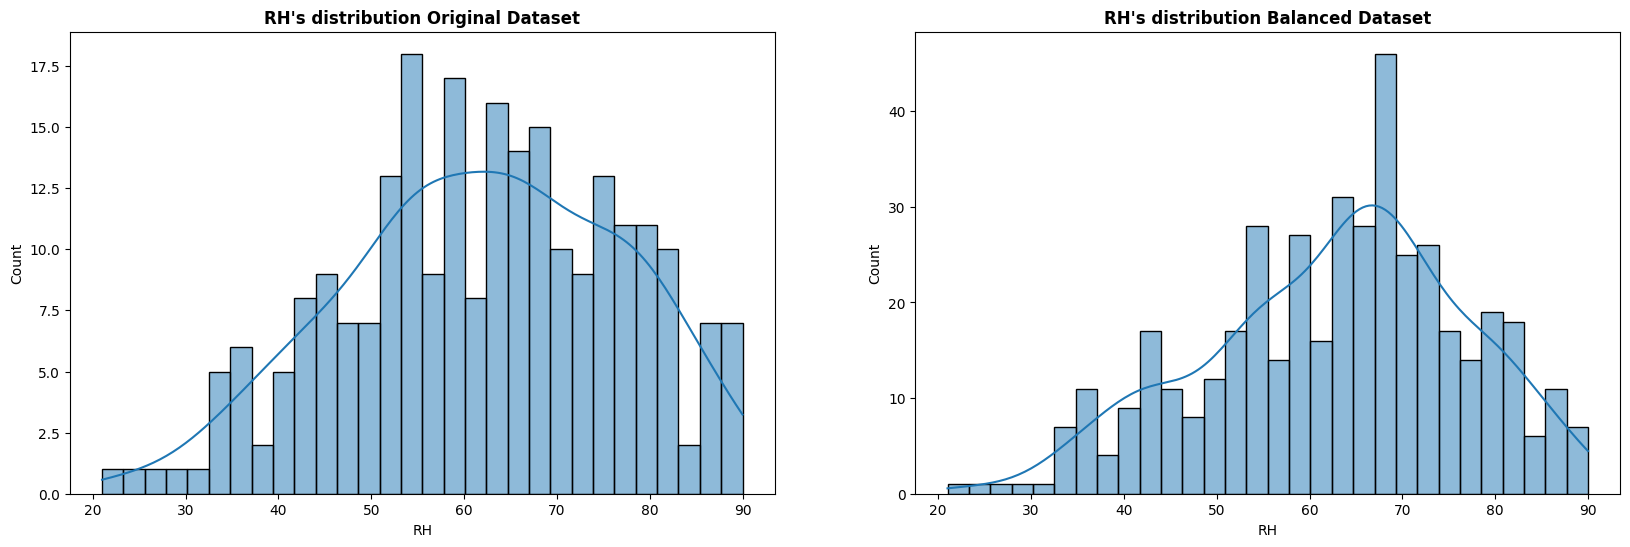

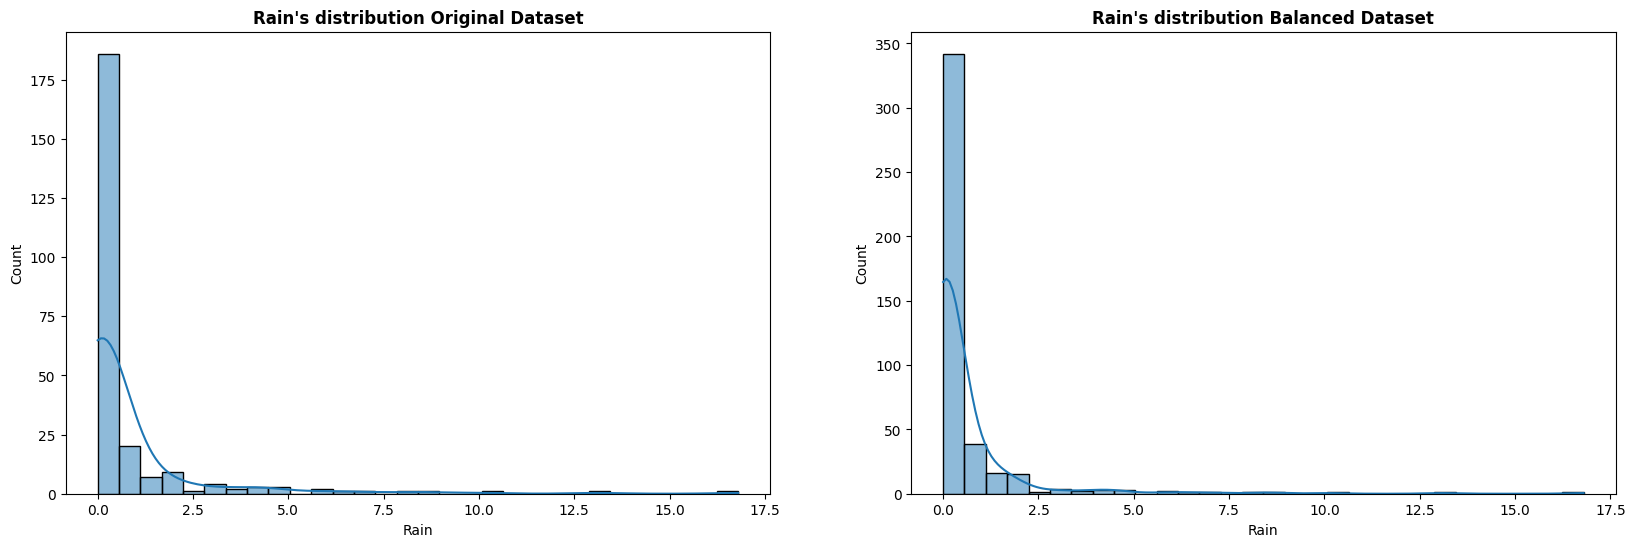

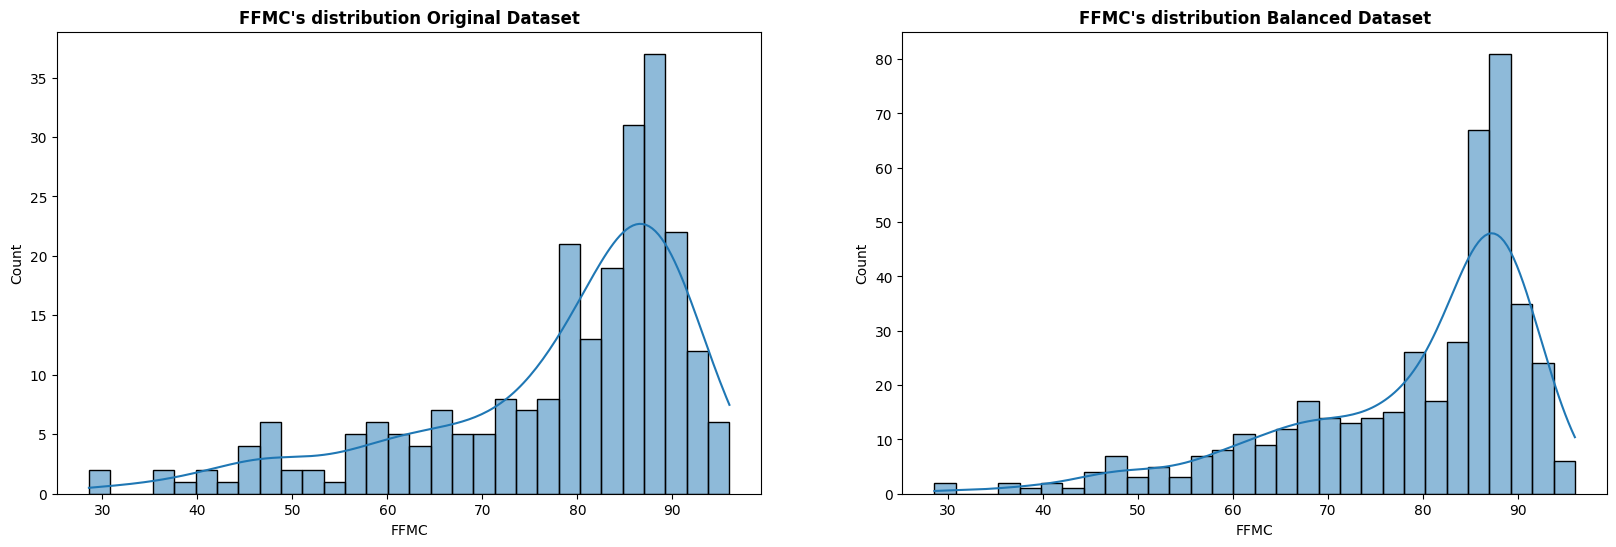

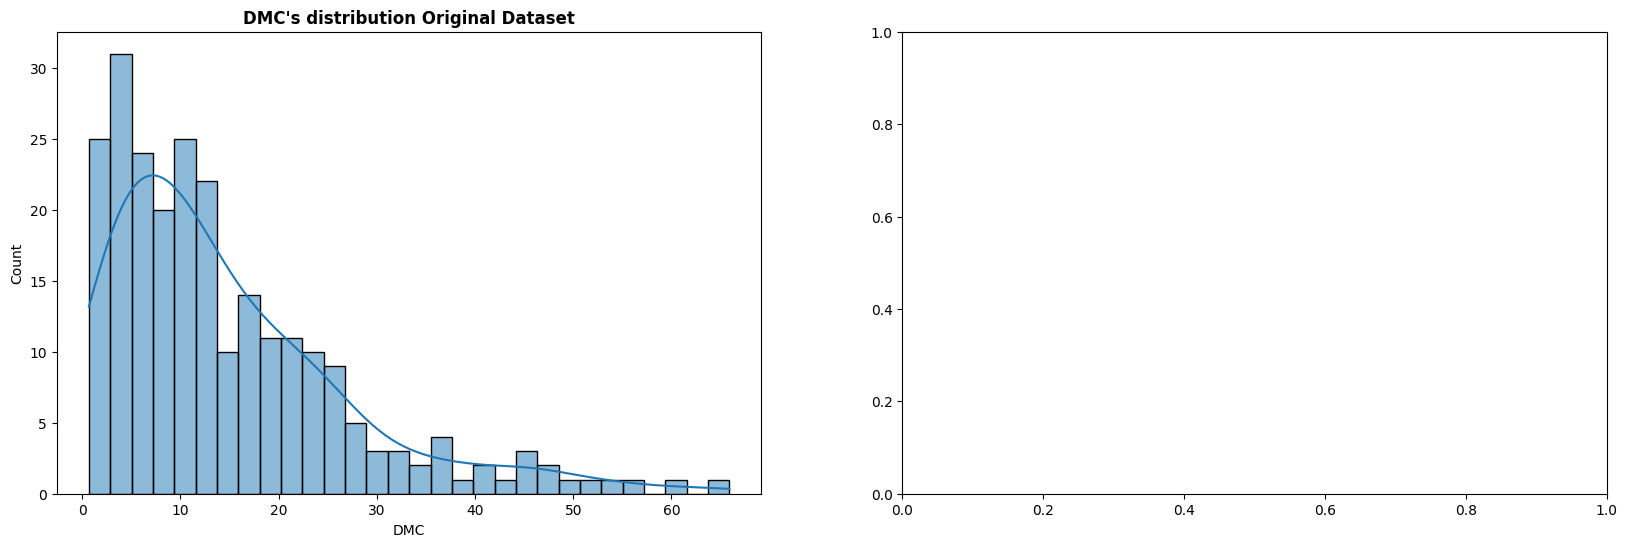

In [81]:
for i in continuous_features:
    plt.figure(figsize=(20,6))
    plt.subplot(121)
    sns.histplot(data=df, x=i, kde=True, bins=30)
    plt.title("{}'s distribution Original Dataset".format(i),fontweight="bold")
    
    plt.subplot(122)
    sns.histplot(data=data_bal, x=i, kde=True, bins=30)
    plt.title("{}'s distribution Balanced Dataset".format(i),fontweight="bold")

ValueError: Could not interpret value `DMC` for parameter `x`

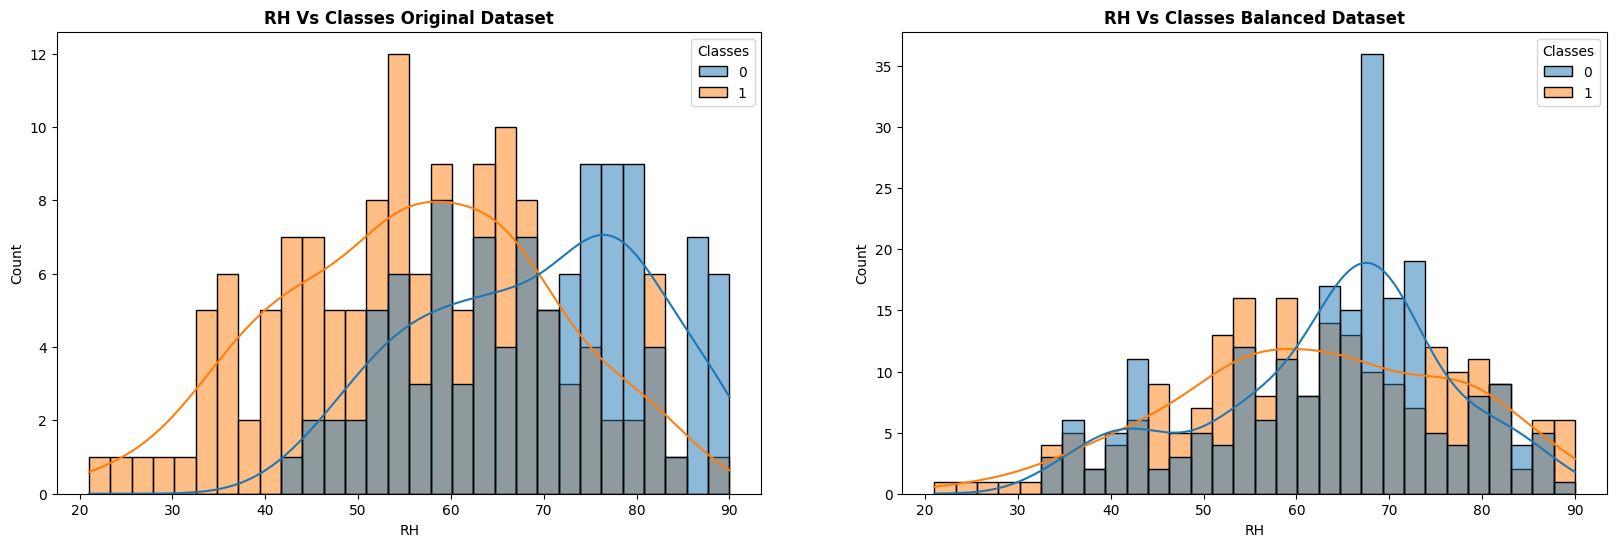

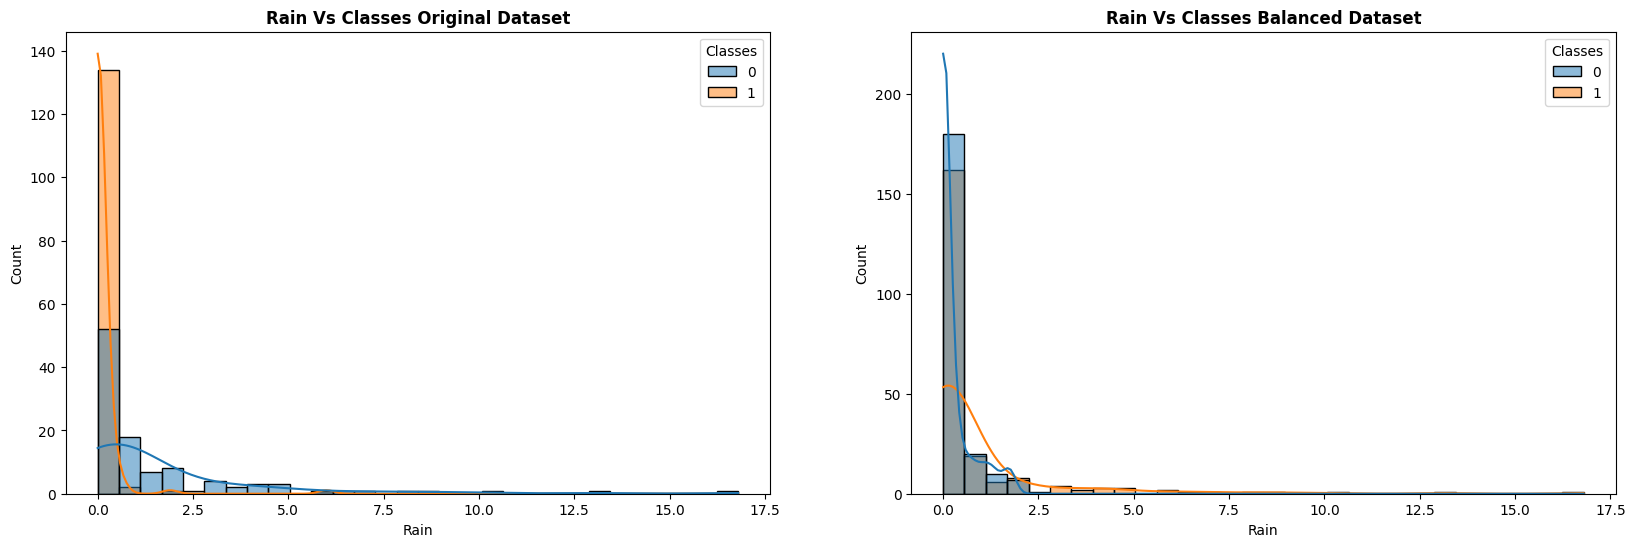

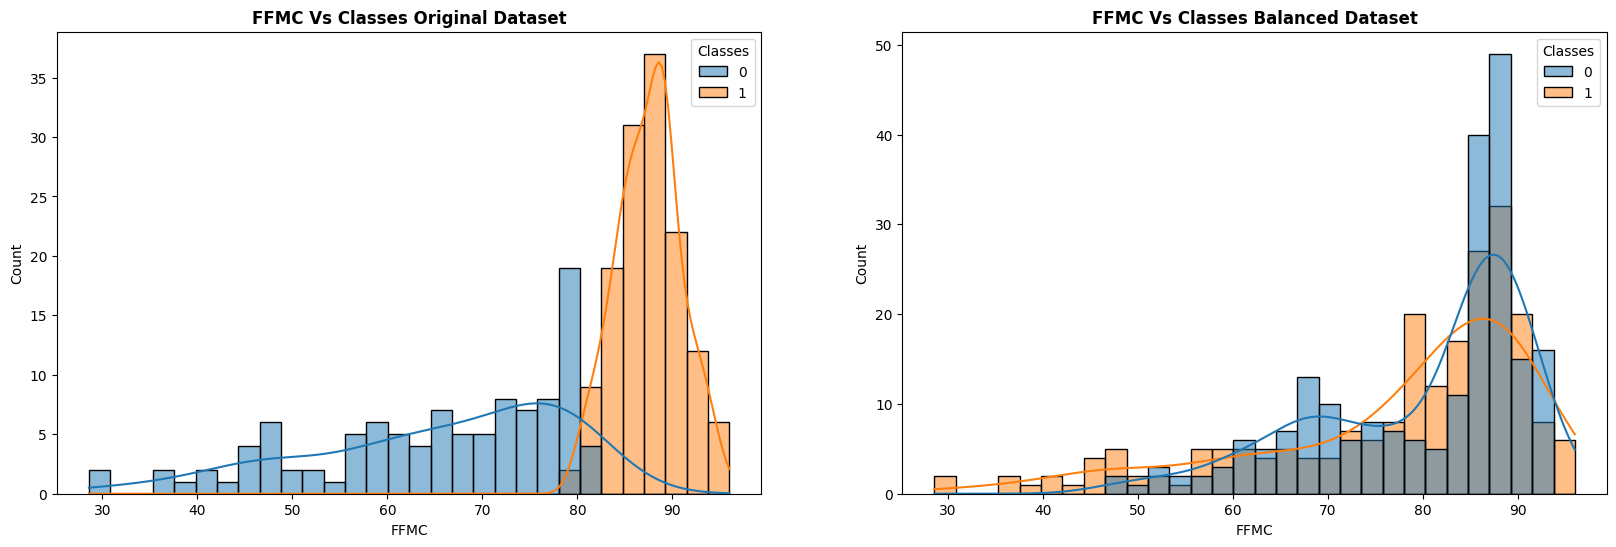

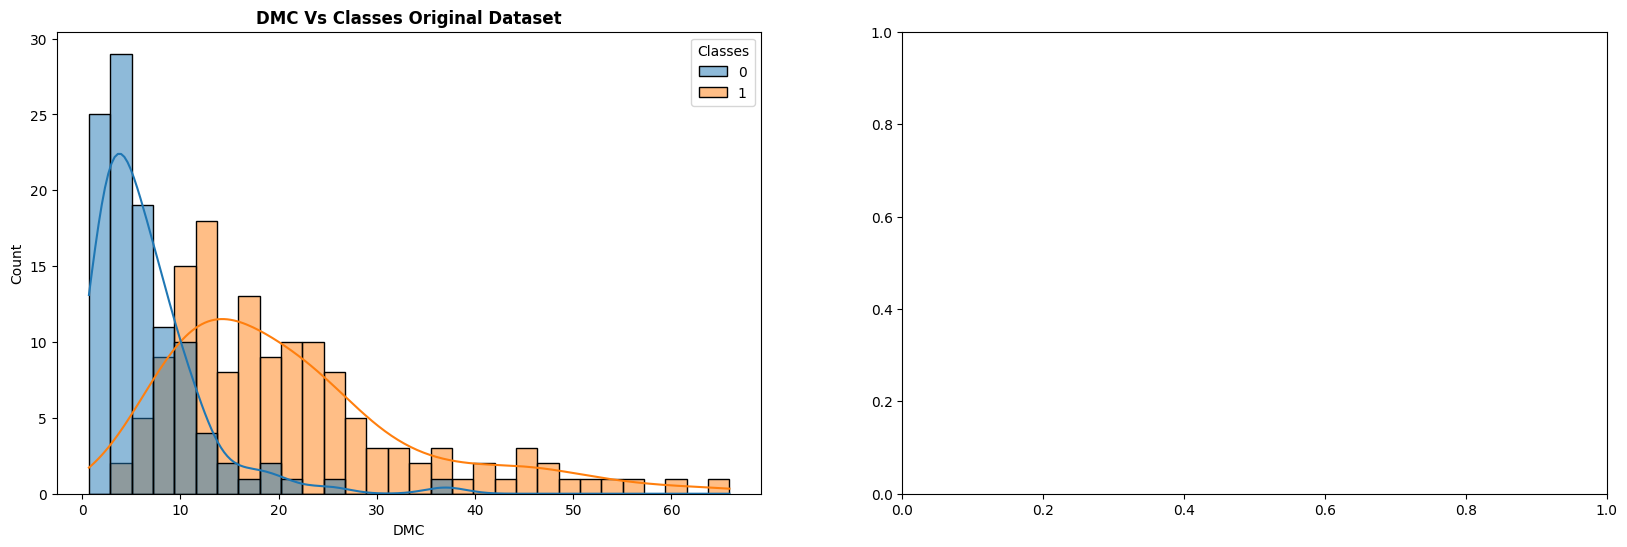

In [82]:
for i in continuous_features:
    plt.figure(figsize=(20,6))
    plt.subplot(121)
    sns.histplot(data=df, x=i, kde=True, bins=30, color='blue', hue='Classes')
    plt.title("{} Vs Classes Original Dataset".format(i),fontweight="bold")
    
    plt.subplot(122)
    sns.histplot(data=data_bal, x=i, kde=True, bins=30, color='blue', hue='Classes')
    plt.title("{} Vs Classes Balanced Dataset".format(i),fontweight="bold")

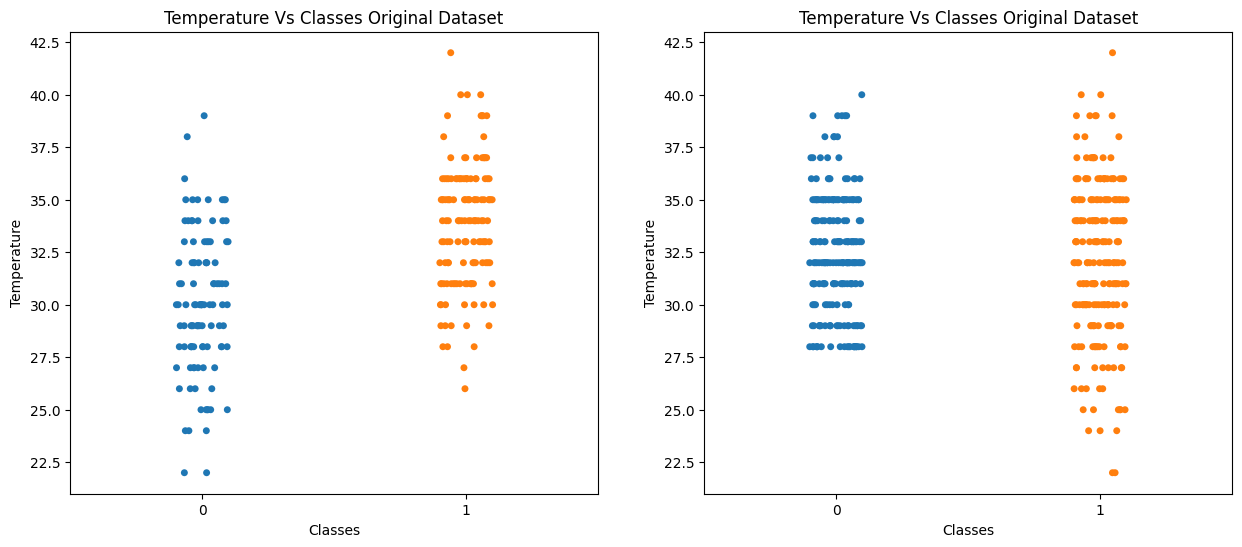

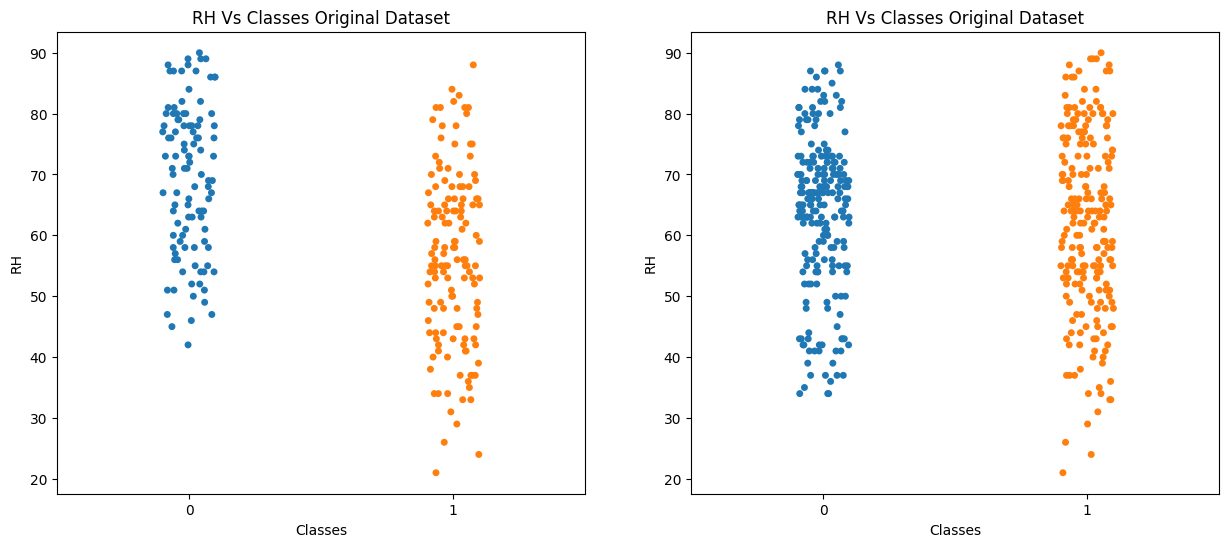

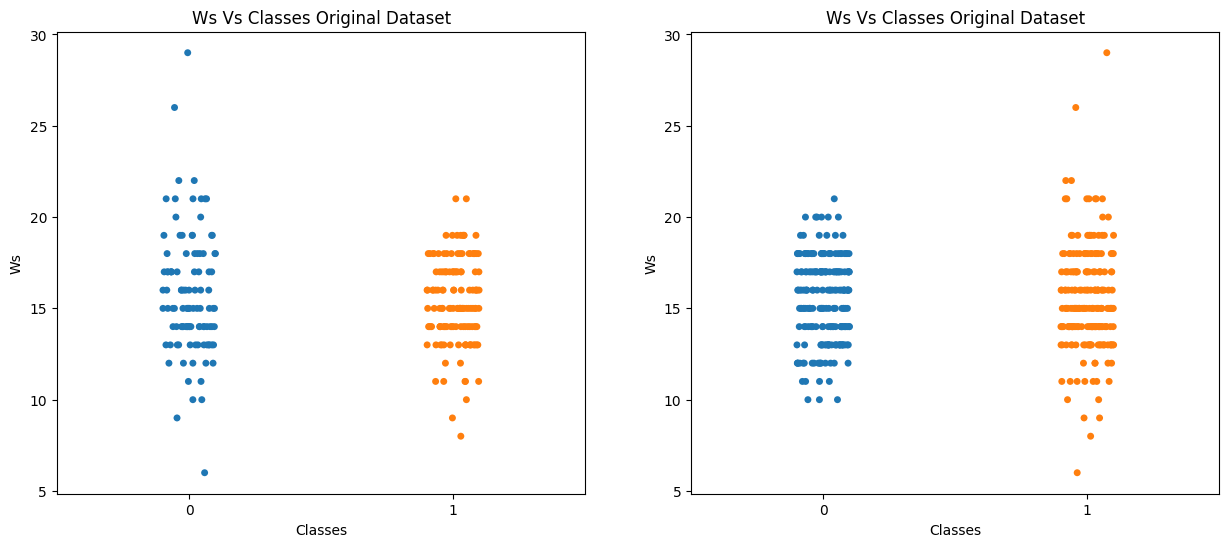

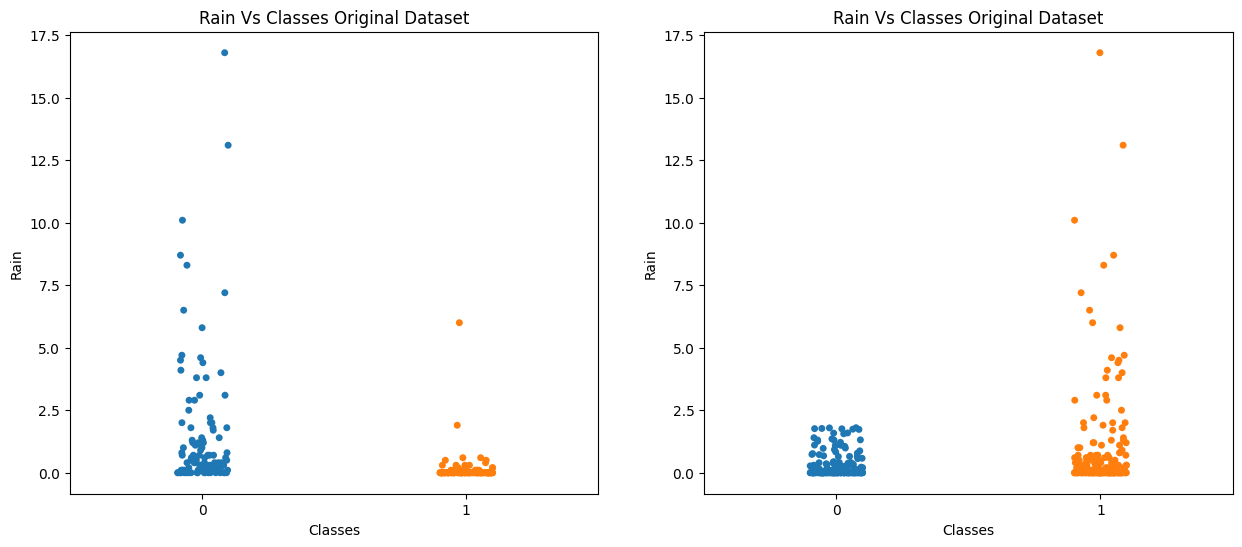

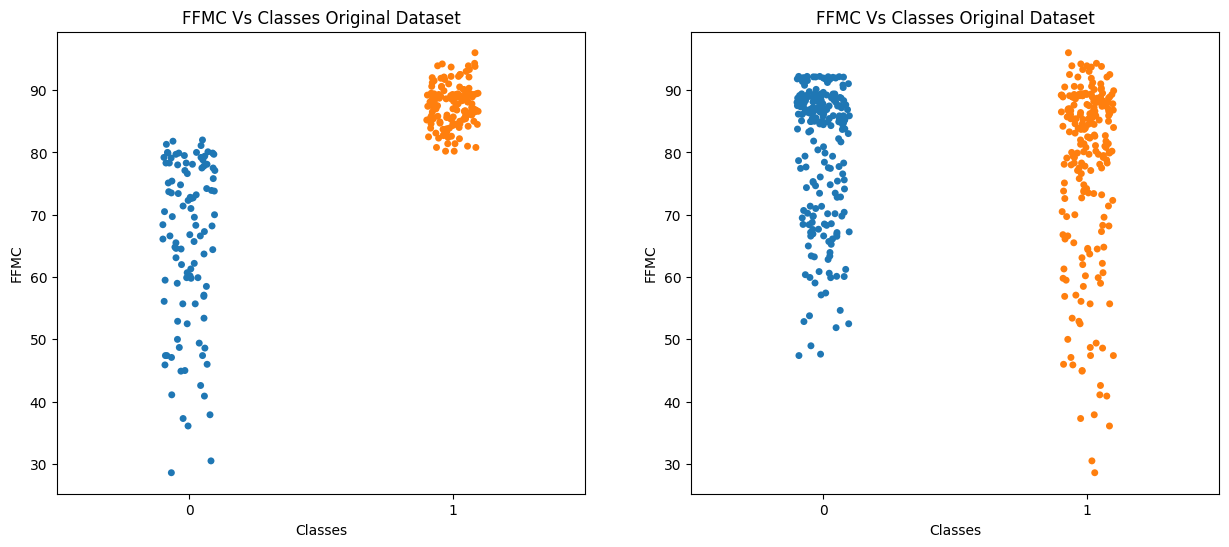

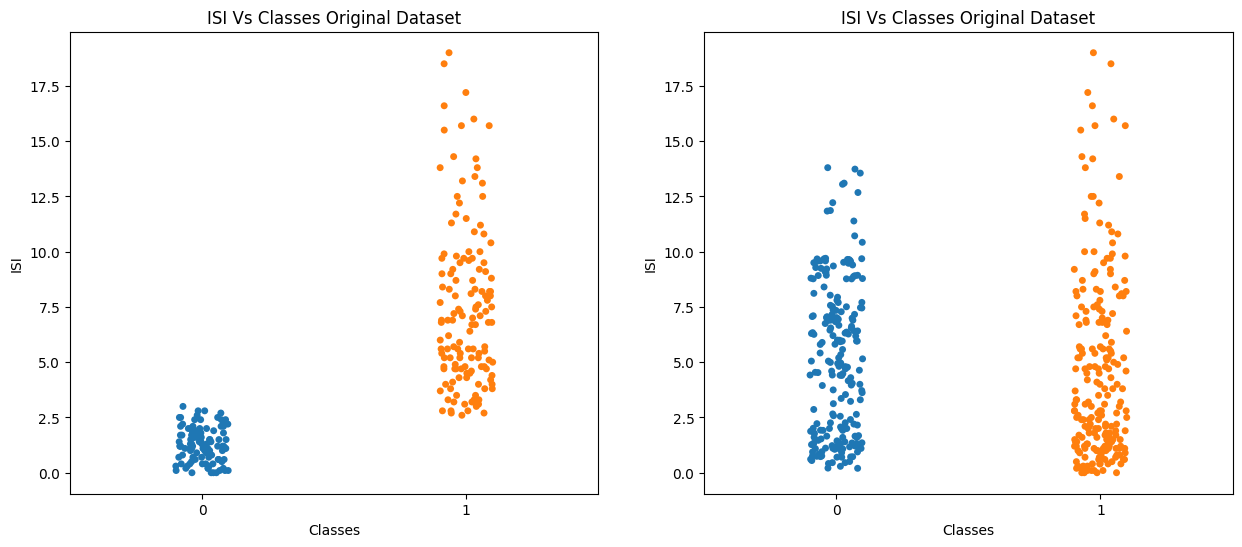

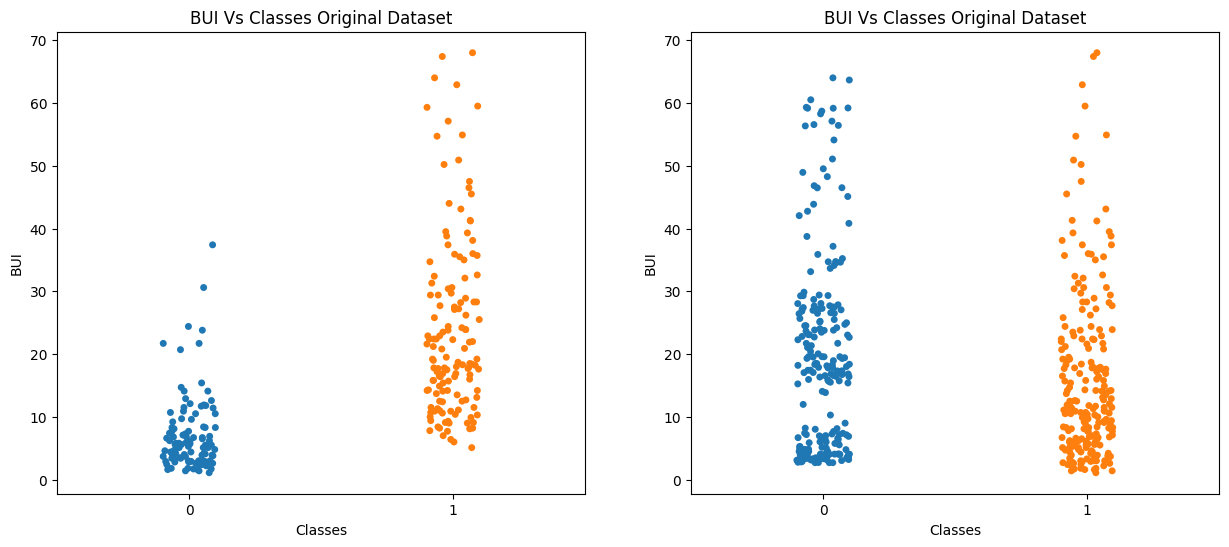

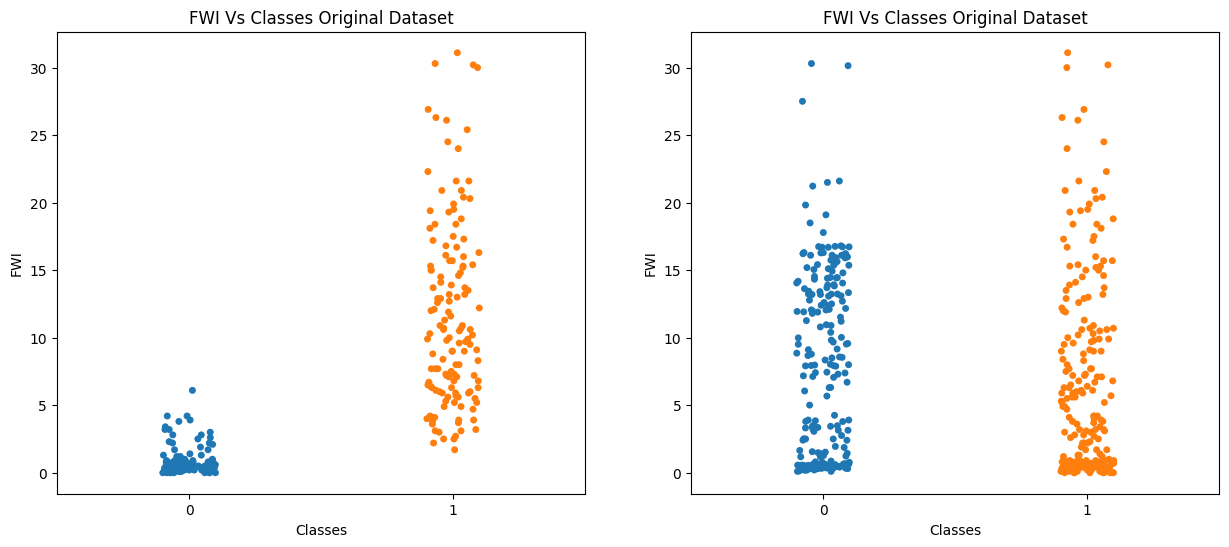

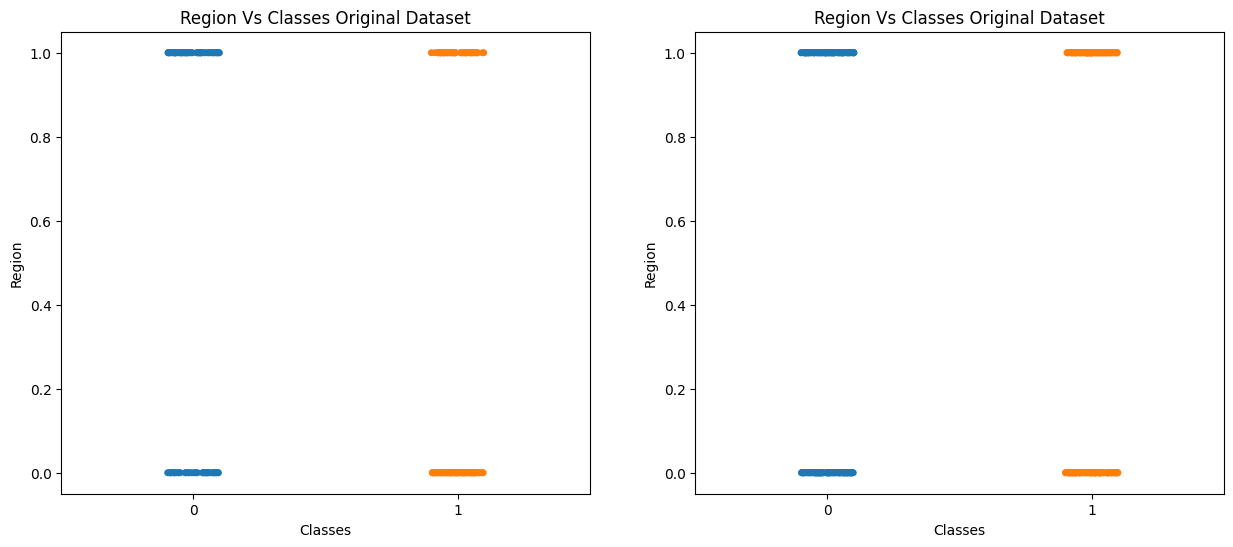

In [85]:
num_feature_custom=[feature for feature in x_col if feature not in ['day', 'month']]  
    
for i in num_feature_custom:
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    sns.stripplot(data=df, y=i, x='Classes')
    plt.title("{} Vs Classes Original Dataset".format(i))
    
    plt.subplot(122)
    sns.stripplot(data=data_bal, y=i, x='Classes')
    plt.title("{} Vs Classes Original Dataset".format(i))

In [86]:
### random state train test split will be same with all people using random_state=16

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_bal, y_bal, test_size=0.30, random_state=16)

X_train1.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,ISI,BUI,FWI,Region
102,18,7,33,68,15,0.0,86.100000,5.200000,23.900000,9.100000,0
343,7,7,33,68,17,0.0,85.472125,5.573751,13.865503,7.126189,1
25,20,6,30,80,16,0.4,59.800000,0.900000,5.100000,0.400000,1
406,1,6,28,59,18,0.0,67.676849,1.442659,3.522279,0.561140,0
303,3,8,30,72,14,0.0,83.486317,3.621579,7.010677,3.143158,0


In [87]:
y_train1.head()

102    1
343    0
25     1
406    0
303    0
Name: Classes, dtype: int64

In [88]:
X_test1.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,ISI,BUI,FWI,Region
279,17,8,37,50,15,0.027725,90.120853,9.644550,26.585071,15.739573,0
18,2,9,22,86,15,10.100000,30.500000,0.000000,1.100000,0.000000,1
282,10,7,33,67,18,0.164678,83.683744,5.341287,16.343157,7.176609,0
87,24,7,28,78,16,0.100000,70.000000,1.400000,14.700000,1.300000,1
232,21,9,35,34,17,0.000000,92.200000,13.800000,29.400000,21.600000,0


In [89]:
scalar = StandardScaler()
scalar

StandardScaler()

In [91]:
X_train1=scalar.fit_transform(X_train1)
X_train1


array([[ 0.42583448, -0.42359564,  0.25294418, ...,  0.44871486,
         0.25754955, -0.93293642],
       [-0.90310402, -0.42359564,  0.25294418, ..., -0.24505222,
        -0.02045731,  1.0718844 ],
       [ 0.66745966, -1.41855284, -0.64171053, ..., -0.85108328,
        -0.96782597,  1.0718844 ],
       ...,
       [ 0.1842093 ,  1.56631876,  0.25294418, ...,  0.34500756,
         1.69419672, -0.93293642],
       [-1.62797956, -1.41855284, -0.93992876, ..., -0.96861822,
        -0.9537412 ,  1.0718844 ],
       [ 0.78827225,  0.57136156,  1.14759889, ...,  1.65171953,
         0.69417761, -0.93293642]])

In [92]:
X_test1=scalar.transform(X_test1)
X_test1

array([[ 0.30502189,  0.57136156,  1.44581712, ...,  0.63435581,
         1.19271858, -0.93293642],
       [-1.50716697,  1.56631876, -3.02745641, ..., -1.12763608,
        -1.02416508,  1.0718844 ],
       [-0.54066625, -0.42359564,  0.25294418, ..., -0.07375163,
        -0.01335582, -0.93293642],
       ...,
       [ 0.90908484,  0.57136156,  0.25294418, ...,  1.91427877,
         1.13940392,  1.0718844 ],
       [ 0.66745966, -0.42359564,  1.14759889, ...,  1.0502172 ,
         1.41250119, -0.93293642],
       [ 1.15071002, -0.42359564, -0.34349229, ...,  0.15022312,
        -0.22471596, -0.93293642]])

In [93]:
### Creating a Logistic regression object
logistic_reg1=LogisticRegression()
logistic_reg1

LogisticRegression()

In [94]:
logistic_reg1.fit(X_train1,y_train1)

LogisticRegression()

In [95]:
logistic_reg_pred1=logistic_reg1.predict(X_test1)
logistic_reg_pred1

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1])

In [96]:
confusion_mat1=confusion_matrix(y_test1, logistic_reg_pred1)
confusion_mat1

array([[49, 26],
       [20, 36]])

In [97]:
truly_positive=confusion_mat1[0][0]
falsely_positive=confusion_mat1[0][1]
falsely_negative=confusion_mat1[1][0]
truly_negative=confusion_mat1[1][1]

In [98]:
### accuracy using accuracy_score
accuracy1=round(accuracy_score(y_test1, logistic_reg_pred1),4)
accuracy1

0.6489

In [99]:
### manual calcualtion for accuracy
accuracy_manual1=round(((truly_positive+truly_negative)/(truly_positive+falsely_positive+falsely_negative+truly_negative)),4)
print("Accuracy of our model is {}".format(accuracy_manual1))

Accuracy of our model is 0.6489


In [ ]:
precision_manual1=round(truly_positive/(truly_positive+falsely_positive),4)
print("Precision of our model is {}".format(precision_manual1))